In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%config InlineBackend.figure_format = 'svg'

# Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib.  
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  
- Создайте датафреймы X и y из этих данных.  
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
- Масштабируйте данные с помощью StandardScaler.  
- Постройте модель TSNE на тренировочный данных с параметрами:  
    - n_components=2, learning_rate=250, random_state=42.  
    - Постройте диаграмму рассеяния на этих данных.  

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

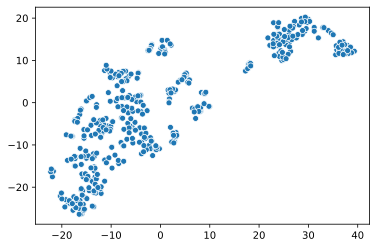

In [6]:
sns.scatterplot(X_train_tsne[:, 0], X_train_tsne[:, 1])

# Задание 2
- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [8]:
kmeans_train = kmeans.fit_predict(X_train_scaled)
kmeans_train

array([1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0,

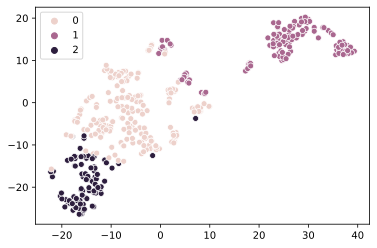

In [9]:
sns.scatterplot(X_train_tsne[:, 0], X_train_tsne[:, 1], hue=kmeans_train)

In [10]:
XX_train = X_train.copy()
XX_train['CLASS'] = kmeans_train
XX_train['PRICE'] = y_train

In [11]:
XX_train.pivot_table(index='CLASS', values=['PRICE', 'CRIM'], aggfunc='mean')

,CRIM,PRICE
CLASS,,
0,0.421660,24.958115
1,10.797028,16.165354
2,0.073566,27.788372


# Задание 3
- Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
- Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
testing = kmeans.predict(X_test_scaled)
testing

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [13]:
XX_test = X_test.copy()
XX_test['CLASS'] = testing
XX_test['PRICE'] = y_test

In [14]:
XX_test.pivot_table(index='CLASS', values=['PRICE', 'CRIM'], aggfunc='mean')

,CRIM,PRICE
CLASS,,
0,0.266079,21.860784
1,10.165531,16.437143
2,0.062060,31.350000
